<a href="https://colab.research.google.com/github/splasherzz/food-allergen-detector/blob/main/project%20code/Project%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI for AI: Utilizing Artificial Intelligence for Allergen Identification in Food**

# **Project Summary**

This project aims to develop an AI model for allergen detection in food products using a multi-label classification approach. It will utilize a Random Forest classifier which will be used for multi-label classification to predict the presence or absence of allergens in food products. This project addresses the limitations of traditional allergen detection methods, ensuring consumer safety and improving food allergen detection accuracy and food quality control processes. Using the "Food Ingredients and Allergens" dataset from Kaggle, the model will be trained to predict the presence of allergenic ingredients in different food products. The model will learn how to recognize patterns and associations between ingredients and allergens. The developed model will then be integrated into a web application for user-friendly allergen detection, where people with allergies can make informed decisions about the food they buy and consume. This project has the potential to benefit food manufacturers, the food service industry, regulatory bodies, and people with allergies, ultimately improving food safety and promoting informed food choices.

# **Data Collection**

We obtained the 2023 Kaggle dataset titled ["Food Ingredients & Allergens"](https://kaggle.com/datasets/uom190346a/food-ingredients-and-allergens) by Laksika Tharmalingam. We augmented data by manually adding 92 entries to the dataset, adding various food products and their allergen labels that we got from Google. The augmented dataset will then be used to train and test our AI model for food allergen detection.

## **Importing the Original Dataset**

The "Food Ingredients & Allergens" dataset is uploaded as a .csv file in our [GitHub repository](https://github.com/splasherzz/food-allergen-detector). This is imported and initialized in our notebook as `og_food`.
We set the content of `data` to the link of the raw dataset file, and then utilize pandas' `.read_csv()` to store the dataframe into `og_food`. Lastly, `.head()` displays the first five rows to visualize the dataframe.

In [365]:
import io
import pandas as pd

# initializing the dataset
data = 'https://raw.githubusercontent.com/splasherzz/food-allergen-detector/main/datasets/%5BOriginal%5D%20Food%20Ingredients%20and%20Allergens.csv'
og_food = pd.read_csv(data)
og_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


## **Dataset Features**

Below is a table of the dataset features and their respective descriptions.

<table>
  <tr>
    <th>Column Name<th/>
    <th>Description<th/>
  <tr/>

  <tr>
    <td>Food Product<td/>
    <td>Name of the food product<td/>
  <tr/>
  <tr>
    <td>Main Ingredient<td/>
    <td>Defining or distinctive ingredient of the food product<td/>
  <tr/>
  <tr>
    <td>Sweetener<td/>
    <td>Substance added to food or drink to impart the flavor of sweetness<td/>
  <tr/>
  <tr>
    <td>Fat/Oil<td/>
    <td>Lipids made from plants, animals, or synthetic compounds used when frying, baking, and preparing foods<td/>
  <tr/>
  <tr>
    <td>Seasoning<td/>
    <td>Salt, herbs, or spices added to food to enhance the flavour<td/>
  <tr/>
  <tr>
    <td>Allergens<td/>
    <td>Any normally harmless substance that causes an immediate allergic reaction in a susceptible person<td/>
  <tr/>
  <tr>
    <td>Prediction<td/>
    <td>Anticipated outcome of the model<td/>
  <tr/>
<table/>

# **Data Preprocessing**

Before augmenting the dataset, we cleaned the original dataset by doing type formatting and handling null values and duplicate entries.

## **Type Formatting (Original Dataset)**

The table provided below summarizes the possible data types that we may encounter when using Pandas.

<table>
  <tr>
    <th>Data type<th/>
    <th>Description<th/>
  <tr/>

  <tr>
    <td>object<td/>
    <td>Text or mixed numeric and non-numeric values<td/>
  <tr/>
  <tr>
    <td>int64<td/>
    <td>Integer numbers<td/>
  <tr/>
  <tr>
    <td>float64<td/>
    <td>Floating point numbers<td/>
  <tr/>
  <tr>
    <td>bool<td/>
    <td>True/False values<td/>
  <tr/>
  <tr>
    <td>datetime64<td/>
    <td>Date and time values<td/>
  <tr/>
  <tr>
    <td>timedelta[ns]<td/>
    <td>Differences between two datetimes<td/>
  <tr/>
  <tr>
    <td>category<td/>
    <td>Finite list of text values<td/>
  <tr/>
<table/>

Using `dtypes` on the dataset, we observed that all columns had the data type `object`, which is described as "text or mixed numeric and non-numeric values." We then perform type formatting to ensure all our columns have the type `category`, as it fits the description of a "finite list of text values." It is also appropriate for our dataset since our columns are different categories of the food product. A loop that goes through the values of each column, in combination with `.astype('category')`, is utilized to convert the datatype. 

In [366]:
# performing type formatting to change all columns data types into "category"
for item in og_food:
  if og_food[item].dtype == object:
    og_food[item] = og_food[item].astype('category')

og_food.dtypes

Food Product       category
Main Ingredient    category
Sweetener          category
Fat/Oil            category
Seasoning          category
Allergens          category
Prediction         category
dtype: object

## **Handling Duplicates & Null Values**

Before dropping duplicates, we first check if there are null values in the dataset. 

We print the number of missing values using `.isna()`, which returns a boolean same-sized object indicating if the values are `NaN`. These values get mapped to `True` values, while everything else gets mapped to `False` values. Thereafter, `.sum()` is used to get the total number of null values per column.

To find all rows that contain null values, we use the syntax `og_food[og_food.isna().any(axis=1)]`. Only one column had a null value and it was in the `Prediction` column. 

In [367]:
# handling null values
print("Total number of missing values in whole dataset:", og_food.isna().sum().sum())
print("\n")
print("Breakdown of which columns have missing values:\n", og_food.isna().sum())
print("\n")
print("Entry with null values:\n", og_food[og_food.isna().any(axis=1)])

Total number of missing values in whole dataset: 1


Breakdown of which columns have missing values:
 Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64


Entry with null values:
     Food Product Main Ingredient Sweetener Fat/Oil     Seasoning  \
338   Baked Ziti           Pasta      None  Cheese  Tomato sauce   

        Allergens Prediction  
338  Wheat, Dairy        NaN  


Upon manually checking the dataset for the row with null value (entry 338), it was a duplicate for the same entry with `Prediction` correctly filled up. Thus, we just drop this single row with null entry. This can be done using `.dropna()`, which drops missing values. By setting its `inplace` parameter to `True`, we specify that this is done on the current dataframe `og_food`.


We also drop the duplicates in the dataset, keeping only the first occurrence. `.drop_duplicates()` returns a dataframe with duplicate rows already removed. Setting the parameter `keep` to `'first'` makes the dataframe keep only the first occurence of the duplicate rows.

In [368]:
# dropping entry with null value
og_food.dropna(inplace=True)

# handling & dropping duplicates
og_food.drop_duplicates(keep='first', inplace=True)
og_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains


After dropping the duplicates and a row with a null value, we check for the current shape of the dataset. As shown below, there are only 308 entries left out of the initial 400. The attribute `.shape` returns a tuple containing the dataframe's number of rows and columns `(rows, columns)`.

In [369]:
og_food.shape

(308, 7)

## **Augmenting the Dataset**
We augment the dataset by downloading the cleaned/preprocessed .csv file and manually adding 92 more entries to reach the same number of rows as prior to the deletion. To procure the data, we looked for random food products, their ingredients, and their allergen labels on Google.
We first made sure that there were no duplicates by searching the food product in the dataset before adding it. The commented lines below are used to save the cleaned dataset's CSV file. 

In [370]:
# # saving it as a CSV file
# df = pd.DataFrame(og_food)
# df.to_csv("[Augmented] Food Ingredients and Allergens.csv", index=False) 

## **Importing the Augmented Dataset**

Then, we import the augmented dataset as `aug_food`, and verify if the dimensions are correct. The dataset is uploaded as a CSV file in our [GitHub repository](https://github.com/splasherzz/food-allergen-detector). We do the same process that we did when we imported the original dataset.

In [371]:
data1 = 'https://raw.githubusercontent.com/splasherzz/food-allergen-detector/main/datasets/%5BAugmented%5D%20Food%20Ingredients%20and%20Allergens.csv'
aug_food = pd.read_csv(data1)

aug_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
2,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
3,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
4,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains


After augmenting, we check for the current shape of the dataset. As shown below, the number of entries are back to the initial 400 due to the additional 92 entries.

In [372]:
aug_food.shape

(400, 7)

## **Type Formatting (Augmented Dataset)**

We perform the same process that we did before to ensure all our columns have the type `category`, as it fits the description of a "finite list of text values." It is also appropriate for our dataset since our columns are different categories of the food product.

In [373]:
# performing type formatting to change all columns data types into "category"
for item in aug_food:
  if aug_food[item].dtype == object:
    aug_food[item] = aug_food[item].astype('category')

aug_food.dtypes

Food Product       category
Main Ingredient    category
Sweetener          category
Fat/Oil            category
Seasoning          category
Allergens          category
Prediction         category
dtype: object

## Lowercase Conversion
Converting the values of the whole dataframe to lowercase is important for consistency and standardization. By doing this, we ensure that the data is consistent throughout, helping to avoid duplicate or mismatched entries.

`.applymap()` takes in a function as its parameter and applies it to the dataframe elementwise. In this case, we use a function that sets the value of `s` to lowercase using `.lower()` if it is a string; else, we do no changes to the value.

In [374]:
aug_food = aug_food.applymap(lambda s: s.lower() if type(s) == str else s)
aug_food.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,almond cookies,almonds,sugar,butter,flour,"almonds, wheat, dairy",contains
1,chicken noodle soup,chicken broth,none,none,salt,"chicken, wheat, celery",contains
2,cheddar cheese,cheese,none,none,salt,dairy,contains
3,ranch dressing,buttermilk,sugar,vegetable oil,"garlic, herbs",dairy,contains
4,caramel popcorn,popcorn,sugar,butter,salt,dairy,contains


## **Converting Categorical Features through Categorical Data Encoding**

After augmenting the dataset, we did categorical data encoding. To convert the qualitative values `'Does not contain'` and `'Contains'` into numerical representation, we respectively map the prediction values to 0 and 1 using `.map()`. This is necessary for training our multilabel classification model, which requires numerical input for making predictions. To optimize the memory allocation of the dataform, we convert the datatype of the values from `int64` to `uint8` via `.astype('uint8')`.

In [375]:
# mapping the prediction values to 0 or 1
aug_food['Prediction'] = aug_food['Prediction'].map({'contains': 1, 'does not contain': 0})

# changing the datatype from int64 to uint8
aug_food['Prediction'] = aug_food['Prediction'].astype('uint8')

# showing that the prediction values are now set to 0/1
aug_food['Prediction']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Prediction, Length: 400, dtype: uint8

We separately obtain the dummies for the `Seasoning` and `Allergens` features to allow for appropriate handling of the non-atomic values. By splitting the multivalued cells into separate values via `get_dummies()`, we create individual binary columns for each seasoning and allergen. This ensures that the resulting dummy variables correctly represent the presence or absence of each specific seasoning or allergen in the dataset, rather than incorrectly representing concatenated strings. 

To optimize the memory allocation of the dataform, we do the same process that we did when we mapped the `Prediction` values to 0s and 1s. The datatype is converted from `int64` to `uint8` with the help of a loop that goes through each value in each column.

We first obtain dummy variables for the `Allergens` column which results in binary columns representing the presence or absence of each unique allergen.

In [376]:
aug_allerg = aug_food['Allergens'].str.replace(' ', '').str.get_dummies(',')
aug_allerg = aug_allerg.add_prefix('Allergens_')

# changing the datatype from int64 to uint8
for c in aug_allerg.columns:
  if aug_allerg[c].dtype == 'int64':
    aug_allerg[c] = aug_allerg[c].astype('uint8')

aug_allerg.head()

,Allergens_alcohol,Allergens_almonds,Allergens_anchovies,Allergens_beef,Allergens_calamari,Allergens_celery,Allergens_chicken,Allergens_cocoa,Allergens_coconut,Allergens_crab,...,Allergens_oats,Allergens_peanuts,Allergens_pinenuts,Allergens_pork,Allergens_rice,Allergens_shellfish,Allergens_shrimp,Allergens_soybeans,Allergens_strawberries,Allergens_wheat
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Secondly, we obtain dummy variables separately for the `Seasoning` column which results in binary columns representing the presence or absence of each unique allergen.

In [377]:
aug_season = aug_food['Seasoning'].str.replace(' ', '').str.get_dummies(',')
aug_season = aug_season.add_prefix('Seasoning_')

# changing the datatype from int64 to uint8
for c in aug_season.columns:
  if aug_season[c].dtype == 'int64':
    aug_season[c] = aug_season[c].astype('uint8')

aug_season.head()

,Seasoning_alfredosauce,Seasoning_almondmilk,Seasoning_almonds,Seasoning_apple,Seasoning_applecider,Seasoning_applejuice,Seasoning_arboriorice,Seasoning_avocado,Seasoning_bacon,Seasoning_bakingpowder,...,Seasoning_vegetablebroth,Seasoning_vegetableoil,Seasoning_vegetables,Seasoning_vinaigrette,Seasoning_vinegar,Seasoning_walnuts,Seasoning_wheatflour,Seasoning_yeast,Seasoning_yogurt,Seasoning_zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The remaining columns of the food allergen dataframe, excluding `Allergens` and `Seasoning`, are transformed into dummy variables.

In [378]:
aug_food.drop(['Seasoning','Allergens'], axis=1, inplace=True)
# performing one-hot encoding on categorical columns
aug_food = pd.get_dummies(aug_food, drop_first=True)

# showing the dataset
aug_food.head()

,Prediction,Food Product_aloo gobi,Food Product_aloo paratha,Food Product_apple,Food Product_apple cider,Food Product_apple crisp,Food Product_apple pie,Food Product_apple sauce,Food Product_apple tart,Food Product_arabic fattoush,...,Fat/Oil_peanut oil,Fat/Oil_pesto sauce,Fat/Oil_sesame oil,Fat/Oil_sour cream,Fat/Oil_soy sauce,Fat/Oil_vegetable oil,Fat/Oil_water,Fat/Oil_whipped cream,Fat/Oil_yogurt,"Fat/Oil_yogurt (milk, cultures)"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally, we combine the three dataframes together into the desired single encoded dataframe using the `pd.concat()` method. This consolidated dataframe can then be used for subsequent modeling. Lastly, we then move the `Prediction` column at the last column.

In [379]:
# Join all columns using pd.concat()
aug_food = pd.concat([aug_food, aug_season, aug_allerg], axis=1)

# Moving the 'Prediction' column to the last position
aug_food = aug_food[[col for col in aug_food.columns if col != 'Prediction'] + ['Prediction']]

# Display the updated DataFrame
aug_food.head()

,Food Product_aloo gobi,Food Product_aloo paratha,Food Product_apple,Food Product_apple cider,Food Product_apple crisp,Food Product_apple pie,Food Product_apple sauce,Food Product_apple tart,Food Product_arabic fattoush,Food Product_arancini,...,Allergens_peanuts,Allergens_pinenuts,Allergens_pork,Allergens_rice,Allergens_shellfish,Allergens_shrimp,Allergens_soybeans,Allergens_strawberries,Allergens_wheat,Prediction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## **Preprocessed Dataset Features**

The data features in the preprocessed dataset represent different food products such as "Aloo Gobi" and "Apple Cider." These features are stored as unsigned 8-bit integers (`uint8`). We use `uint8` for efficient memory usage as the binary values of the features can be accommodated within this range (decimal values 0-255).

We use the attribute `.dtypes` to show the datatype of the values in each column of the dataframe.

In [380]:
aug_food.dtypes

Food Product_aloo gobi       uint8
Food Product_aloo paratha    uint8
Food Product_apple           uint8
Food Product_apple cider     uint8
Food Product_apple crisp     uint8
                             ...  
Allergens_shrimp             uint8
Allergens_soybeans           uint8
Allergens_strawberries       uint8
Allergens_wheat              uint8
Prediction                   uint8
Length: 764, dtype: object

# **Data Modeling**

After cleaning and preprocessing the data, we can now proceed to modeling the data using multi-label classification and Random Forest Classifier.

## **Training the Model**

**Random Forest** is a commonly used machine learning model that is often effective in handling high-dimensional data (Zhang et. al, 2023), which is particularly relevant to our dataset since it encompasses a large number of food products and their allergens. It is a combination of one or more hierarchical predictive models called decision trees, yielding the modal class as the output for the classification task (Pillai & Malhotra, 2020). Recently, the study about oral food challenges demonstrated that the Random Forest Classifier achieved the best performance in terms of the Area Under a Curve metric for each food allergen (Zhang et. al, 2023). 

Thus, we begin our data modeling by instantiating a **random forest classifier**, an ensemble-based machine learning algorithm commonly used for classification tasks. The classifier is configured as follows:
- **100** decision trees
- maximum depth of **10**
- random seed of **42**

In [381]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

We assign the variable `X` to the `aug_food` dataframe with the `Prediction` column dropped, representing the input features. Similarly, the variable `y` is assigned to the `Prediction` column, representing the target variable.

In [382]:
from sklearn.model_selection import train_test_split

X = aug_food.drop('Prediction', axis = 1)
y = aug_food['Prediction']

The next step is to split the data into training and testing subsets via the `train_test_split` function. The split is performed such that 70% of the data is assigned to the training set, while 30% is assigned to the testing set. Subsequently, the X train and Y train subsets are fitted using the Random Forest Classifier.

In [383]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [384]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## **Saving the Model**



The last step is to save the model pickle file using pickle's `.dump()`. This can then be loaded in the webapp to predict results.

In [385]:
import pickle

filename = "model.pkl"

# save model
# pickle.dump(classifier, open(filename, "wb"))

# **Results**

We check for the accuracy of the model below using the method `.score()`. This utilizes `X_test` to create predictions in the background and uses those predictions to determine the testing accuracy score.

In [386]:
classifier.score(X_test, y_test)

0.975

The prediction summary is shown as a confusion matrix using sklearn's `confusion_matrix`. It displays the number of accurate and wrong predictions made for each class. It aids in clarifying the classes that models mistake for other classes.

In [387]:
from sklearn.metrics import classification_report, confusion_matrix
pred = classifier.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

Confusion Matrix: 
 [[37  2]
 [ 1 80]]


In [388]:
print('Classification Report: \n', classification_report(y_test,pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.98      0.99      0.98        81

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Finally, we compare the accuracy scores of the model using the training set, and the testing set. This can be done using sklearn's `accuracy_score()`.

In [389]:
from sklearn.metrics import accuracy_score
# evaluating performance on the training set
train_predictions = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# evaluating performance on the validation set
test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9928571428571429
Testing Accuracy: 0.975


We also plot the ROC (Receiver Operating Characteristic) curve, which is created by plotting the true positive rateagainst the false positive rate at different classification thresholds. Due to this, we are able to assess the classifier's performance in accurately identifying food products that contain allergens and those that do not contain allergens. Here we use the same Random Forest classifier to generate predicted probabilities (`.predict_proba`) for the testing data `y_pred`. 

The `roc_curve` function  computes the false positive rate (FPR), true positive rate (TPR), and thresholds based on the predicted probabilities and the true labels (y_test). The  `auc` function calculates the area under the ROC curve (AUC). Finally, the ROC curve is plotted using `matplotlib.pyplot`, displaying the AUC value and the diagonal reference line representing random guessing. 

The nearly horizontal line observed in the ROC curve, particularly at or close to the y-value of 1.0, implies that the classifier is consistently predicting positive instances (food products containing allergens) regardless of the classification threshold used.

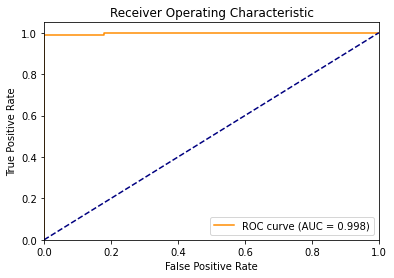

In [390]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for the testing data
y_pred = classifier.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



We also check the **precision-recall curve** to examine the tradeoff between precision and recall for various thresholds. The curve illustrates the relationship between these two metrics, with a higher area under the curve indicating both high precision and high recall. 

The horizontal line at a precision value of 1 approaching the point (1,1) indicates that the classifier is consistently identifying positive instances (e.g., food products containing allergens) with both high precision (low false positive rate) and high recall (low false negative rate).

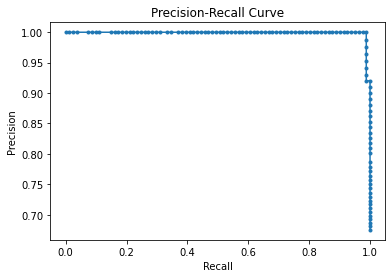

In [391]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have the true labels (y_true) and predicted probabilities for positive class (y_pred_probs)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plotting the Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Meanwhile, we also analyze feature importances to determine the relative importance of each feature in influencing the system's predictions. Most notably is the the presence/absence of the `Allergens_none` feature being the most important factor for determining the predictions in the food allergen detection system, with  the highest importance score. This suggests that whether a food product is labelled to contain any allergens or not has a significant impact on the classification outcome.

When training the model, if a food product is said to not contain any allergens, it is likely to be classified as safe for individuals with food allergies. Therefore, the absence of allergens becomes a crucial feature in making accurate predictions.

In [364]:
pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

Allergens_none                      0.295655
Allergens_dairy                     0.115173
Allergens_wheat                     0.071569
Fat/Oil_butter                      0.032186
Sweetener_none                      0.030193
Sweetener_sugar                     0.017901
Seasoning_none                      0.016399
Allergens_fish                      0.016038
Allergens_eggs                      0.013396
Main Ingredient_mixed vegetables    0.012393
Fat/Oil_olive oil                   0.011978
Main Ingredient_tomatoes            0.009894
Allergens_soybeans                  0.009619
Seasoning_cilantro                  0.009384
Fat/Oil_vegetable oil               0.008402
Fat/Oil_none                        0.007625
Seasoning_lemonjuice                0.007412
Main Ingredient_quinoa              0.007092
Seasoning_groundmeat                0.006905
Seasoning_rice                      0.006849
dtype: float64